# Eight Queens Genetic Algorithim

In [5]:
import random

from scipy import special

def generate_board_state(number_of_queens):
    return [random.randrange(number_of_queens) for num in range(number_of_queens )]

def generate_population(number_of_queens=8, size_of_population=19):
        return [generate_board_state(number_of_queens) for _ in range(size_of_population)]

def check_for_completed_board(boards, number_of_queens, perfect_score):
    for board in boards:
        if generate_fitness_score(board, number_of_queens) == perfect_score:
            return board

    return []


In [6]:
def generate_fitness_score(board_state, number_of_queens):
    """determine number of queens not being attacked
        :input board_state array of queens
    """
    fitness_score = 0

    for determining_row_index in range(number_of_queens):
        determining_value = board_state[determining_row_index]
        for row_index in range(number_of_queens):
            # can't attack itself
            if determining_row_index == row_index:
                continue
            if board_state[row_index] == determining_value:
                continue
            if row_index + board_state[row_index] == determining_row_index + determining_value:
                continue
            if row_index - board_state[row_index] == determining_row_index - determining_value:
                continue

            fitness_score += 1

    return fitness_score / 2


## test genereate fitness score
generate_fitness_score([7,1,4,2,0,6,3,5], number_of_queens=8) == 28

True

In [7]:
def _random_weighted_choice(population, weights, selected=None):
    """pick one from list proportional to weights"""

    if selected is not None:
        index = population.index(selected)
        population = population[:index] + population[index+1:]
        weights = weights[:index] + weights[index+1:]

    return random.choices(population, weights=weights, k=1)[0]


def selection(boards, fitness_scores, size_of_population):
    """return a list of selected pairs"""
    # create weights

    selected = []
    for _ in range(size_of_population):
        parent_one = _random_weighted_choice(boards, fitness_scores)
        parent_two = _random_weighted_choice(boards, fitness_scores, selected=parent_one)

        selected.append((parent_one, parent_two))

    return selected



test_population = [[1],[2],]
weights = [1,1]

selection(test_population, weights, size_of_population=2)

test_population = [[1],[2],[3],[4]]
weights = [19,20,26,16]

selection(test_population, weights, size_of_population=4)


[([1], [4]), ([3], [1]), ([1], [2]), ([3], [1])]

In [8]:

def _crssover(parent_one, parent_two, cross_over_index):
    return parent_one[:cross_over_index] + parent_two[cross_over_index:]

def crossover(selected_pairs, number_of_queens):

    children = []
    for s_p in selected_pairs:
        # generate random cross over points - 0 - max number of queens
        cross_over_index = random.randint(0, number_of_queens - 1)
        parent_one = s_p[0]
        parent_two = s_p[1]   

        child = _crssover(parent_one, parent_two, cross_over_index)
        children.append(child)

    return children


crossover([([1,1,1,1,1,1,1,1], [0,0,0,0,0,0,0,0])], number_of_queens=8)

[[1, 0, 0, 0, 0, 0, 0, 0]]

In [9]:
def _mutate(board, number_of_queens):
    mutation_point = random.randint(0, number_of_queens - 1)
    # TODO this could possibly be the same value

    current_value = board[mutation_point]
    new_value = current_value

    while new_value == current_value:
        new_value = random.randint(0, number_of_queens - 1)

    board[mutation_point] = new_value

    return board


def mutation(boards, mutation_frequency, number_of_queens):        
    for i,board in enumerate(boards):
        x = random.randint(1, mutation_frequency)
        if x == 1:
            boards[i] = _mutate(board, number_of_queens)
    return boards


_mutate([1,2,3], 3)
mutation([[1,2,3]], 3, 3)

[[1, 2, 3]]

In [33]:
def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    # a fitness score is calculated based off the number of non attacking queen pairs
    fit_scores = [generate_fitness_score(board, number_of_queens) for board in population]

    # fitness scores

    # c) select parents
    # two parents are selected at random - in accordance with probability from score in b)
    # a cross over point is chosen at random from positions in the string
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    # offspring are created by crossing over parent strings at the crossover point
    # crossover(selected_pairs,number_of_queens)
    children = crossover(selected_pairs, number_of_queens)


    # e) mutation
        # each location is subject to random mutation with a small independent probability
        # this involves choosing a queen at random and moving it to a random square in its column
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated, fit_scores

    # f) TODO is this a thing?????
    # introduce previous top scoring offspring to keep fitness ??? is this part of original algo?? or an optimisation????


In [73]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=19
MUTATION_FREQUENCY = 15
# TODO HOW IS THIS CALCULATED
perfect_score = special.comb(NUMBER_OF_QUEENS, 2)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_board = []

    # # g) check if it has found correct state and exit loop
    while not completed_board:
        population, fitness_scores = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_board = check_for_completed_board(population, NUMBER_OF_QUEENS, perfect_score)
        gen += 1

        if gen == 30000:
            break
        # if gen % 1000 == 0:
        #     print(f"run for {gen} generations")

    stop_time = timeit.default_timer()

    print(f"elapsed_time: {stop_time - start_time}")
    print(f"number_of_generations: {stop_time - start_time}")
    print(f"completed_state: {completed_board}")
    print("=========================")

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_board
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result



elapsed_time: 1.9335542999997415
number_of_generations: 1.9335542999997415
completed_state: [5, 1, 6, 0, 3, 7, 4, 2]


{'elapsed_time': 1.9335542999997415,
 'number_of_generations': 1028,
 'completed_state': [5, 1, 6, 0, 3, 7, 4, 2]}

In [74]:
# import pickle

# NUMBER_OF_QUEENS=8
# SIZE_OF_POPULATION=19
# MUTATION_FREQUENCY = 15
# # TODO HOW IS THIS CALCULATED
# perfect_score = special.comb(NUMBER_OF_QUEENS, 2)


# # generate test populations

# test_population = []

# for i in range(10):
#         test_population.append( generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION))

# with open('test_populations', 'wb') as f:
#         pickle.dump(test_population, f)

In [75]:
with open('test_populations', 'rb') as f:
    test_population = pickle.load(f)


In [76]:

# file = open("test_populations",'rb')
# object_file = pickle.load(file)

# results = {
#         "elapsed_time": [],
#         "number_of_generations": [],
#         "completed_state": []
# }

# for pop in test_population:

#         ga_result = genetic_algorithm(population)

#         results["elapsed_time"].append(ga_result["elapsed_time"])
#         results["number_of_generations"].append(ga_result["number_of_generations"])
#         results["completed_state"].append(ga_result["completed_state"])


# results

elapsed_time: 1.8402081000003818
number_of_generations: 1.8402081000003818
completed_state: [3, 1, 7, 4, 6, 0, 2, 5]
elapsed_time: 13.361163099999885
number_of_generations: 13.361163099999885
completed_state: [2, 5, 7, 0, 4, 6, 1, 3]
elapsed_time: 4.498586400000022
number_of_generations: 4.498586400000022
completed_state: [6, 2, 0, 5, 7, 4, 1, 3]
elapsed_time: 8.640800000000127
number_of_generations: 8.640800000000127
completed_state: [4, 2, 7, 3, 6, 0, 5, 1]
elapsed_time: 3.6264616000003116
number_of_generations: 3.6264616000003116
completed_state: [5, 0, 4, 1, 7, 2, 6, 3]
elapsed_time: 12.657745200000136
number_of_generations: 12.657745200000136
completed_state: [2, 5, 3, 0, 7, 4, 6, 1]
elapsed_time: 20.983718899999985
number_of_generations: 20.983718899999985
completed_state: [1, 3, 5, 7, 2, 0, 6, 4]
elapsed_time: 3.0167365999996036
number_of_generations: 3.0167365999996036
completed_state: [5, 1, 6, 0, 2, 4, 7, 3]
elapsed_time: 10.663382199999887
number_of_generations: 10.663382199

{'elapsed_time': [1.8402081000003818,
  13.361163099999885,
  4.498586400000022,
  8.640800000000127,
  3.6264616000003116,
  12.657745200000136,
  20.983718899999985,
  3.0167365999996036,
  10.663382199999887,
  6.26673269999992],
 'number_of_generations': [1101,
  8011,
  2869,
  5802,
  3517,
  9207,
  16688,
  2325,
  9129,
  5009],
 'completed_state': [[3, 1, 7, 4, 6, 0, 2, 5],
  [2, 5, 7, 0, 4, 6, 1, 3],
  [6, 2, 0, 5, 7, 4, 1, 3],
  [4, 2, 7, 3, 6, 0, 5, 1],
  [5, 0, 4, 1, 7, 2, 6, 3],
  [2, 5, 3, 0, 7, 4, 6, 1],
  [1, 3, 5, 7, 2, 0, 6, 4],
  [5, 1, 6, 0, 2, 4, 7, 3],
  [0, 6, 3, 5, 7, 1, 4, 2],
  [3, 1, 6, 2, 5, 7, 4, 0]]}

In [81]:
len(results["completed_state"])

10

In [97]:
import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()


print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")

   elapsed_time  number_of_generations           completed_state
0      1.840208                   1101  [3, 1, 7, 4, 6, 0, 2, 5]
1     13.361163                   8011  [2, 5, 7, 0, 4, 6, 1, 3]
2      4.498586                   2869  [6, 2, 0, 5, 7, 4, 1, 3]
3      8.640800                   5802  [4, 2, 7, 3, 6, 0, 5, 1]
4      3.626462                   3517  [5, 0, 4, 1, 7, 2, 6, 3]
5     12.657745                   9207  [2, 5, 3, 0, 7, 4, 6, 1]
6     20.983719                  16688  [1, 3, 5, 7, 2, 0, 6, 4]
7      3.016737                   2325  [5, 1, 6, 0, 2, 4, 7, 3]
8     10.663382                   9129  [0, 6, 3, 5, 7, 1, 4, 2]
9      6.266733                   5009  [3, 1, 6, 2, 5, 7, 4, 0]
mean_number_of_generations: 6365.8
std_number_of_generations: 4612.909657809387
mean_elapsed_time: 8.555553480000025
std_elapsed_time: 5.968429446604741


<AxesSubplot:xlabel='elapsed_time', ylabel='number_of_generations'>

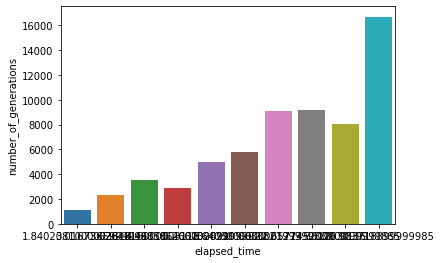

In [89]:
import seaborn as sns

sns.barplot(x='elapsed_time', y='number_of_generations', data=results_df.reset_index())